In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sinsq(x,y): #target function
    return np.sin(x*x+y*y)

x = np.linspace(-1.5,1.5,50)
y = x
X,Y = np.meshgrid(x,y)
Z = sinsq(X,Y)

In [2]:
# generate a Dataset
#we need a vector of 2D points: represented as a ntrainX2 matrix ((x,y) for each element)

n_train = 10000
n_valid = int(n_train/10)
sigma = 0.2

#training data
x0_train = np.random.uniform(-1.5,1.5,n_train)
x1_train = np.random.uniform(-1.5,1.5,n_train)

x_train = np.column_stack((x0_train,x1_train))

y_train = np.random.normal(sinsq(x0_train,x1_train),sigma)

#validation data
x0_valid = np.random.uniform(-1.5,1.5,n_valid)
x1_valid = np.random.uniform(-1.5,1.5,n_valid)

x_valid = np.column_stack((x0_valid,x1_valid))

y_valid = np.random.normal(sinsq(x0_valid,x1_valid),sigma)


(1000,) (1000,) (1000,)


Text(0.5, 0, 'z')

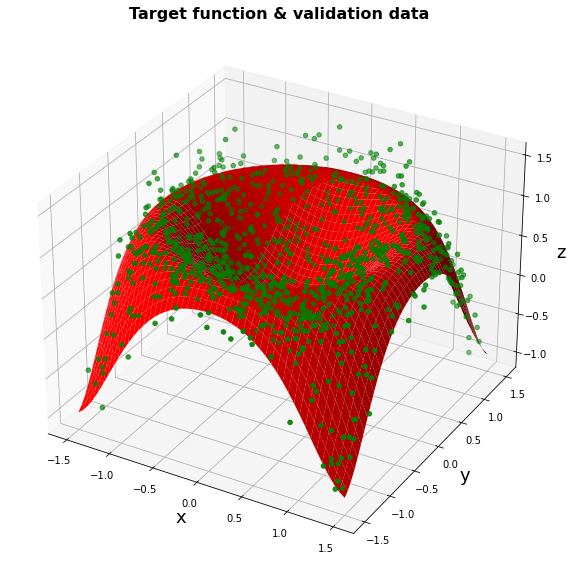

In [3]:
#graphing the target function and the validation points
xdata = x_valid.T[0]
ydata = x_valid.T[1]
zdata = y_valid

print(xdata.shape,ydata.shape,zdata.shape)

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                color='r',edgecolor='none',label='Target function')
                #cmap='coolwarm', edgecolor='none')
ax.scatter3D(xdata, ydata, np.resize(zdata,(n_valid,)), color='green',marker='o',label='validation data')
ax.set_title('Target function & validation data',fontweight='bold',fontsize=16)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
#ax.legend()


In [4]:
#building the model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()
model.add(Dense(35, input_shape=(2,), activation='relu')) #input_shape now takes 2 input parameters (x, y)
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

2022-01-15 17:17:30.690249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-15 17:17:30.690280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-15 17:17:45.489608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-15 17:17:45.489644: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-15 17:17:45.489675: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gilberto-Aspire-E5-573G): /proc/driver/nvidia/version does not exist
2022-01-15 17:17:45.489971: I tensorflow/core/platfor

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 35)                105       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,546
Trainable params: 1,546
Non-trainable params: 0
_________________________________________________________________


In [5]:


# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=100, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))



2022-01-15 17:17:50.020711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-15 17:17:50.106968: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2194935000 Hz


Epoch 1/100
100/100 [==============================] - 2s 3ms/step - loss: 0.2306 - mse: 0.2306 - val_loss: 0.1837 - val_mse: 0.1837
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1806 - mse: 0.1806 - val_loss: 0.1799 - val_mse: 0.1799
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1755 - mse: 0.1755 - val_loss: 0.1760 - val_mse: 0.1760
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1714 - mse: 0.1714 - val_loss: 0.1724 - val_mse: 0.1724
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1679 - mse: 0.1679 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1644 - mse: 0.1644 - val_loss: 0.1657 - val_mse: 0.1657
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1610 - mse: 0.1610 - val_loss: 0.1625 - val_mse: 0.1625
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - 

100/100 [==============================] - 0s 2ms/step - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0657 - val_mse: 0.0657
Epoch 63/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0655 - val_mse: 0.0655
Epoch 64/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 65/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 66/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 67/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 68/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 69/100
100/100 [==============================] - 0s 2ms/step - loss:

In [8]:
#evaluation
# evaluate model - with validation data
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with validation data---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model - with the exact curve
y_target=sinsq(x0_valid,x1_valid)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with the exact curve---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.0609 - mse: 0.0609

---Evaluation with validation data---
 Test loss: 0.060897618532180786
Test accuracy: 0.060897618532180786
32/32 [==============================] - 0s 2ms/step - loss: 0.0157 - mse: 0.0157

---Evaluation with the exact curve---
 Test loss: 0.01571567729115486
Test accuracy: 0.01571567729115486


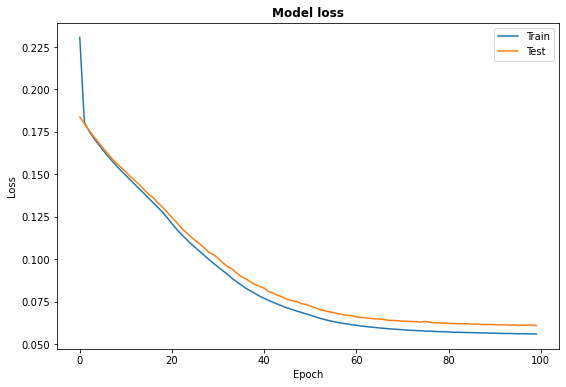

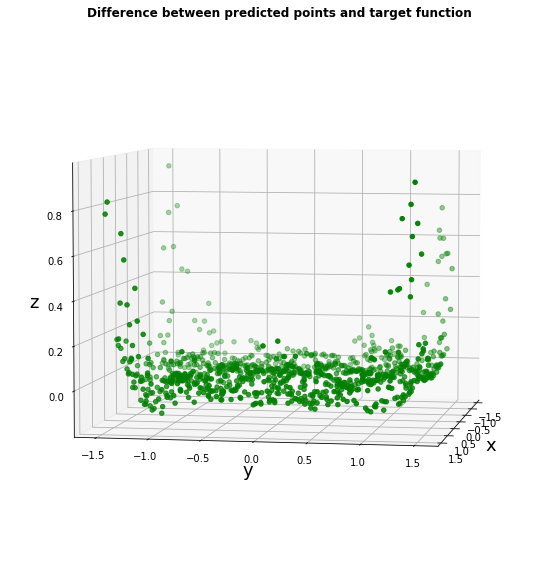

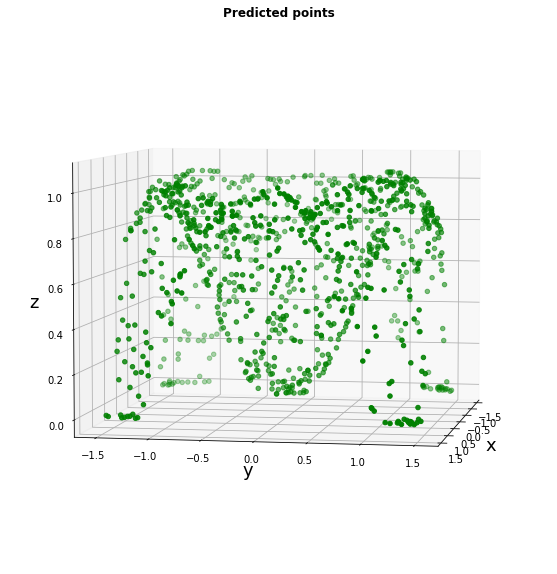

In [9]:
# Plot training & validation loss values over time
plt.figure(figsize=(9,6))
plt.title('Loss function over time')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss',fontweight='bold')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#make and plot prediction
x0_pred = np.random.uniform(-1.5,1.5,n_valid)
x1_pred = np.random.uniform(-1.5,1.5,n_valid)

x_pred = np.column_stack((x0_pred,x1_pred))
y_pred = model.predict(x_pred)
y_target = sinsq(x0_pred,x1_pred)

delta = np.resize(y_pred,(n_valid,))-y_target


fig=plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(x0_pred, x1_pred, delta, color='green',marker='o')
ax.set_title('Difference between predicted points and target function',fontweight='bold')
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
ax.view_init(5, 10)

fig=plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(x0_pred, x1_pred, y_pred, color='green',marker='o')
ax.set_title('Predicted points',fontweight='bold')
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
ax.view_init(5, 10)